> PROJECT  TITLE: LOAN PREDICTION




#PROBLEM STATEMENT


Build a predictive model to assess whether a loan application will be approved or rejected based on the applicant's demographic, financial, and credit history information. This can help financial institutions automate the loan approval process, reducing manual effort and ensuring fair decisions.

#OBJECTIVE


 1. **Loan Default Prediction**
   - Predict whether a borrower will default on a loan based on their financial history, demographic data, and loan details.

 2. **Credit Scoring**
   - Develop a credit scoring model to rank borrowers based on their risk of default.

 3. **Fraud Detection**
   - Identify potentially fraudulent loan applications or repayments.

 4. **Loan Approval Automation**
   - Build a decision-making system for approving or rejecting loan applications using applicant features.

 5. **Risk Segmentation**
   - Segment borrowers into risk categories (low, medium, high) based on repayment behavior or creditworthiness.

 6. **Portfolio Analysis**
   - Analyze the composition of a loan portfolio, including default rates, repayment trends, and return on investment.

 7. **Customer Profiling**
   - Understand the characteristics of borrowers who default or repay successfully to improve targeting strategies.

 8. **Impact Analysis**
   - Study how loan amount, interest rates, or repayment terms affect the likelihood of default or early repayment.

 9. **Compliance and Fair Lending**
   - Evaluate the fairness of loan approval decisions across demographic groups to ensure compliance with regulations.




> The target variable is typically the loan approval status, which indicates whether a loan is approved 1 or not 0.



#UNDERSTANDING DATA



> IMPORT LIBRARIES



In [ ]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

> LOAD THE LOAN DATASET






In [ ]:
df = pd.read_csv('/content/loan_data.csv')



> GET BASIC INFORMATION OF THE DATASET





In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26257 entries, 0 to 26256
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   person_age                      26257 non-null  float64
 1   person_gender                   26257 non-null  object 
 2   person_education                26257 non-null  object 
 3   person_income                   26257 non-null  float64
 4   person_emp_exp                  26257 non-null  int64  
 5   person_home_ownership           26257 non-null  object 
 6   loan_amnt                       26257 non-null  float64
 7   loan_intent                     26257 non-null  object 
 8   loan_int_rate                   26257 non-null  float64
 9   loan_percent_income             26256 non-null  float64
 10  cb_person_cred_hist_length      26256 non-null  float64
 11  credit_score                    26256 non-null  float64
 12  previous_loan_defaults_on_file  

In [ ]:
df

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
0,22.0,female,Master,71948.0,0,RENT,35000.0,PERSONAL,16.02,0.49,3.0,561.0,No,1.0
1,21.0,female,High School,12282.0,0,OWN,1000.0,EDUCATION,11.14,0.08,2.0,504.0,Yes,0.0
2,25.0,female,High School,12438.0,3,MORTGAGE,5500.0,MEDICAL,12.87,0.44,3.0,635.0,No,1.0
3,23.0,female,Bachelor,79753.0,0,RENT,35000.0,MEDICAL,15.23,0.44,2.0,675.0,No,1.0
4,24.0,male,Master,66135.0,1,RENT,35000.0,MEDICAL,14.27,0.53,4.0,586.0,No,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26252,29.0,female,High School,91131.0,8,MORTGAGE,15000.0,MEDICAL,15.33,0.16,10.0,590.0,No,1.0
26253,28.0,female,Bachelor,75625.0,7,RENT,14000.0,VENTURE,10.99,0.19,10.0,647.0,No,0.0
26254,27.0,female,Bachelor,120932.0,1,MORTGAGE,3000.0,VENTURE,12.84,0.02,10.0,695.0,Yes,0.0
26255,27.0,female,Bachelor,68809.0,3,RENT,14000.0,HOMEIMPROVEMENT,13.87,0.20,8.0,656.0,No,1.0




>RETURNS THE DIAMENTION OF THE DATASET



In [ ]:
df.shape

(26257, 14)



> PROVAIDES SUMMERY STATISTICAL FOR NMERICAL COLUMNS



In [ ]:
df.describe()

,person_age,person_income,person_emp_exp,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,loan_status
count,26257.000000,2.625700e+04,26257.000000,26257.000000,26257.000000,26256.000000,26256.000000,26256.000000,26256.000000
mean,25.666184,7.392621e+04,3.522794,9294.561450,10.996533,0.141648,4.446793,630.152994,0.222882
std,3.745193,4.542480e+04,3.811009,6110.857069,3.066231,0.086954,2.415021,49.788771,0.416188
min,20.000000,8.000000e+03,0.000000,500.000000,5.420000,0.000000,2.000000,421.000000,0.000000
25%,23.000000,4.596700e+04,0.000000,5000.000000,8.490000,0.080000,3.000000,600.000000,0.000000
50%,25.000000,6.564700e+04,3.000000,8000.000000,11.010000,0.120000,4.000000,637.000000,0.000000
75%,28.000000,9.069200e+04,6.000000,12000.000000,13.110000,0.190000,6.000000,667.000000,0.000000
max,144.000000,1.440746e+06,125.000000,35000.000000,20.000000,0.660000,10.000000,807.000000,1.000000




> VISHUALIZES THE DISTRIBUTION OF THE TARGET VARIABLE



<Axes: xlabel='loan_status', ylabel='count'>

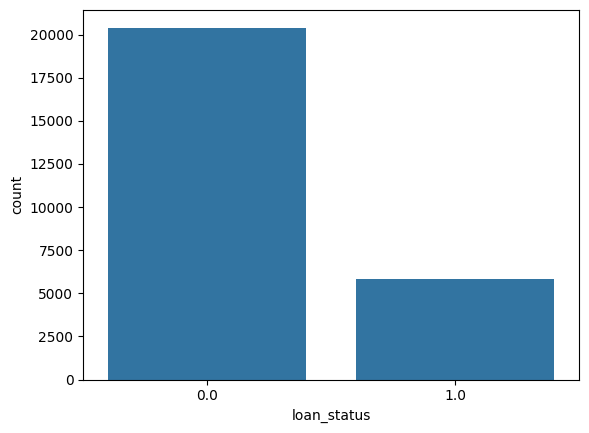

In [ ]:
sns.countplot(x="loan_status",data=df)

#ENCODING CATEGORICAL DATA

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
le = LabelEncoder()



> CONVERT CATEGORICAL COLUMNS INTO NUMERICAL FORMAT



In [ ]:
a = ['person_gender','previous_loan_defaults_on_file']
for i in a:
  df[i]=le.fit_transform(df[i])



> MAP ORDINAL CATEGORIES TO MEANINGFUL NUMERICAL VALUES



In [ ]:
ordinal_mappings = {
    'person_education': {'High School': 1, 'Master': 2, 'Bachelor': 3, 'Associate': 4, 'Doctorate': 5},
    'person_home_ownership': {'RENT': 1, 'MORTGAGE': 2, 'OWN': 3, 'OTHER': 4},
    'loan_intent': {'PERSONAL': 1, 'EDUCATION': 2, 'MEDICAL': 3, 'VENTURE': 4, 'HOMEIMPROVEMENT': 5, 'DEBTCONSOLIDATION': 6}}

for column, mapping in ordinal_mappings.items():
    df[column] = df[column].map(mapping)

In [ ]:
df

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
0,22.0,0,2,71948.0,0,1,35000.0,1,16.02,0.49,3.0,561.0,0,1.0
1,21.0,0,1,12282.0,0,3,1000.0,2,11.14,0.08,2.0,504.0,1,0.0
2,25.0,0,1,12438.0,3,2,5500.0,3,12.87,0.44,3.0,635.0,0,1.0
3,23.0,0,3,79753.0,0,1,35000.0,3,15.23,0.44,2.0,675.0,0,1.0
4,24.0,1,2,66135.0,1,1,35000.0,3,14.27,0.53,4.0,586.0,0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26252,29.0,0,1,91131.0,8,2,15000.0,3,15.33,0.16,10.0,590.0,0,1.0
26253,28.0,0,3,75625.0,7,1,14000.0,4,10.99,0.19,10.0,647.0,0,0.0
26254,27.0,0,3,120932.0,1,2,3000.0,4,12.84,0.02,10.0,695.0,1,0.0
26255,27.0,0,3,68809.0,3,1,14000.0,5,13.87,0.20,8.0,656.0,0,1.0


#CLEANING



> COUNTS MISSING VALUES PER COLUMNS



In [ ]:
df.isnull().sum()

,0
person_age,0
person_gender,0
person_education,0
person_income,0
person_emp_exp,0
person_home_ownership,0
loan_amnt,0
loan_intent,0
loan_int_rate,0
loan_percent_income,1




>COUNTS DUPLICATE ROW



In [ ]:
df.duplicated().sum()

0

#BALANCING DATASET



> Purpose:

Address class imbalance in the target variable.
SMOTE: Generates synthetic examples of the minority class to balance the dataset.
Ensures the model is not biased towards the majority cl


In [ ]:
from imblearn.over_sampling import RandomOverSampler, SMOTE
import pandas as pd

In [ ]:
# Assuming df is your DataFrame with 'loan_status' as the target variable
x = df.drop('loan_status', axis=1)
y = df['loan_status']

# Check for NaN values in 'loan_status' and remove them
# This will drop the rows that have missing values in the 'loan_status' column
df = df.dropna(subset=['loan_status'])

# Reset x and y to reflect the dropped rows
x = df.drop('loan_status', axis=1)
y = df['loan_status']

# Create an oversampler object (choose either RandomOverSampler or SMOTE)
# Uncomment the one you wish to use:
# ros = RandomOverSampler()  # For Random Over Sampling
ros = SMOTE()  # For Synthetic Minority OverSampling

# Apply OverSampler to the data
x_resampled, y_resampled = ros.fit_resample(x, y)

# Create a new DataFrame with resampled data
# Ensure x_resampled is a DataFrame and y_resampled is Series to allow concatenation
x_resampled = pd.DataFrame(x_resampled, columns=x.columns)
y_resampled = pd.Series(y_resampled, name='loan_status')

df = pd.concat([x_resampled, y_resampled], axis=1)

<Axes: xlabel='loan_status', ylabel='count'>

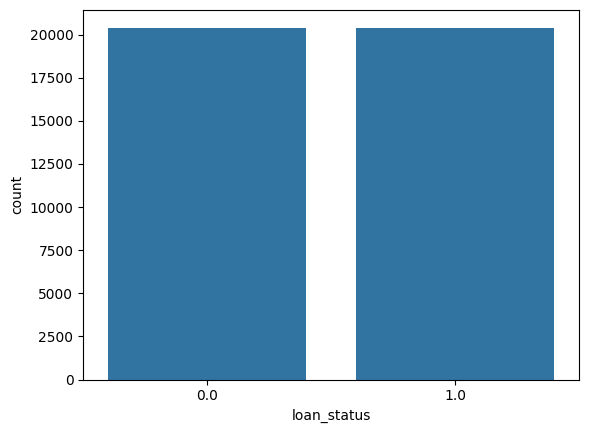

In [ ]:
sns.countplot(x="loan_status",data=df)



> heatmap

Visualizes correlations. High correlation between features may indicate redundanc



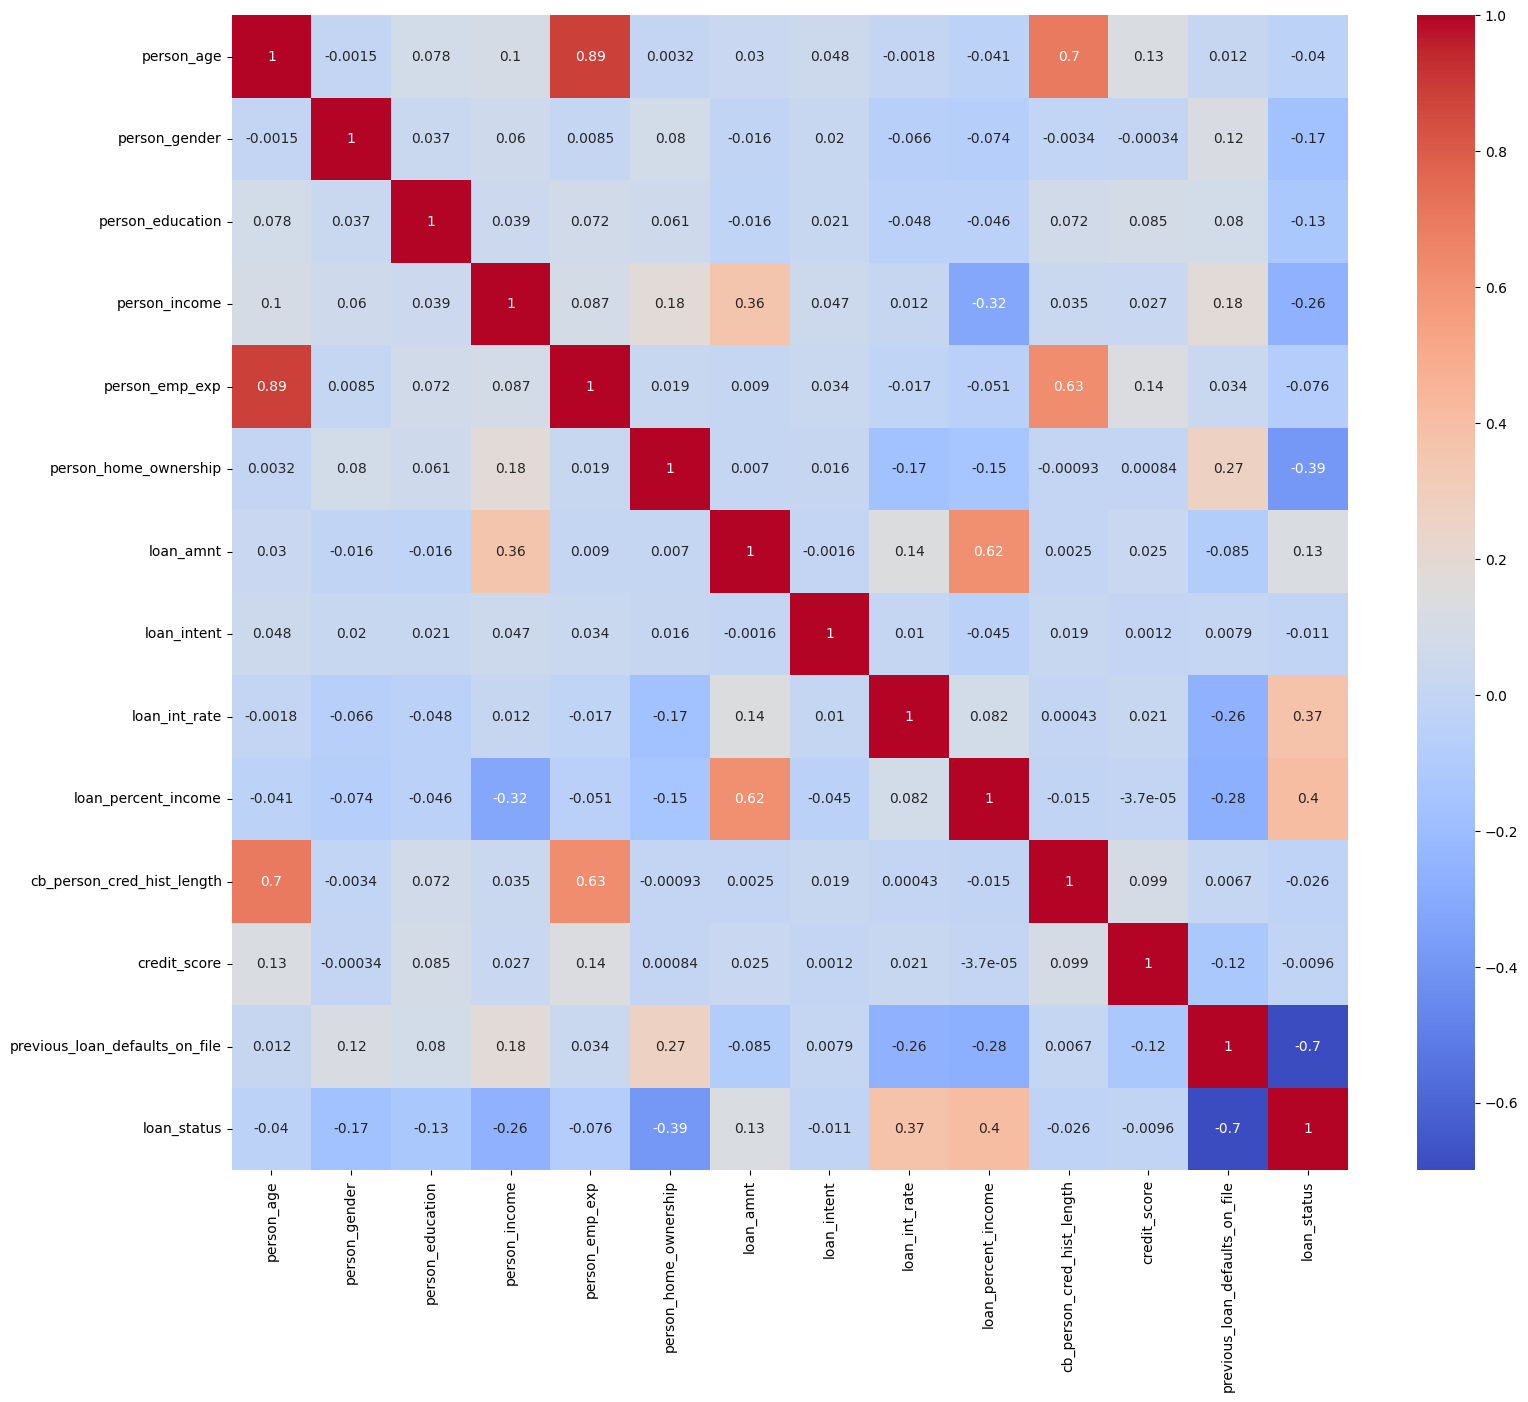

In [ ]:
x = df.corr()
plt.figure(figsize =(18, 15))
sns.heatmap(x, annot = True, cmap = 'coolwarm')
plt.show()

In [ ]:
a= ['person_age','person_gender','person_education','person_emp_exp','loan_intent',
    'cb_person_cred_hist_length','credit_score',]

for i in a:
  df.drop(columns=[i],inplace=True)

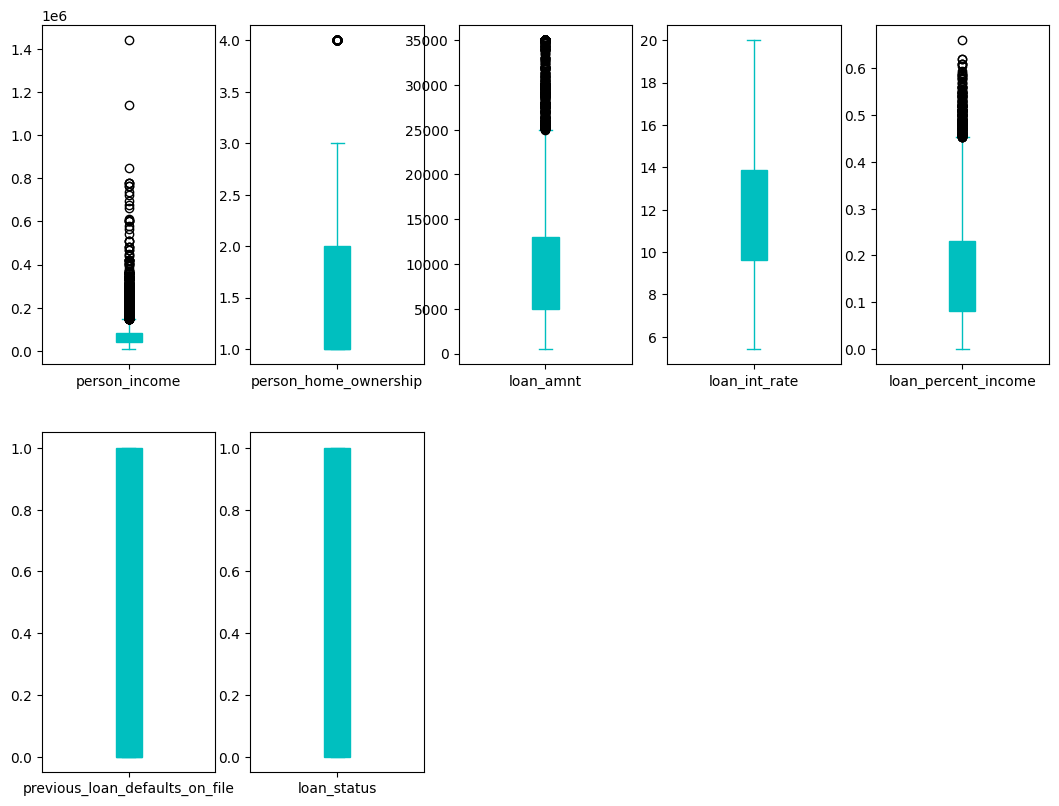

In [ ]:
df.plot(kind='box',subplots=True,
        layout=(3,5),figsize=(13,15),
        color='c',patch_artist=True)

plt.show()



> Remove extreme values using the Interquartile Range (IQR) method.




In [ ]:
Q1=np.quantile(df, 0.25)
Q2=np.quantile(df, 0.50)
Q3=np.quantile(df, 0.75)
Q1, Q2, Q3


(0.16410316277430326, 1.0, 5000.0)

In [ ]:
IQR = Q3 - Q1
IQR

4999.835896837226



>  Remove extreme values using the Interquartile Range (IQR) method.


> Outliers are values beyond the range [Q1 - 2*IQR, Q3 + 2*IQR].





In [ ]:
def remove_outliers_iqr(df, column):
    # Calculate Q1 (25th percentile) and Q3 (75th percentile) for the column
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)

    # Calculate the Interquartile Range (IQR)
    IQR = Q3 - Q1

    # Define the lower and upper bounds for detecting outliers
    lower_bound = Q1 - 2  * IQR
    upper_bound = Q3 + 2  * IQR

    # Filter out the outliers from the DataFrame
    df_filtered = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    return df_filtered
for i in df.columns:
    df = remove_outliers_iqr(df, i)

In [ ]:
df.shape

(39335, 7)



> Normalize the data to reduce skewness in feature distributions.




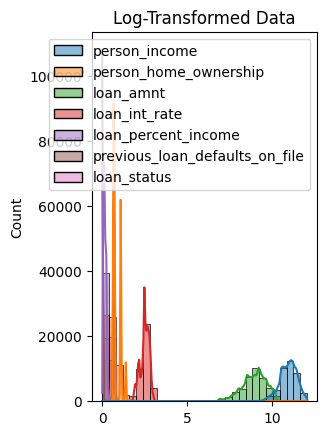

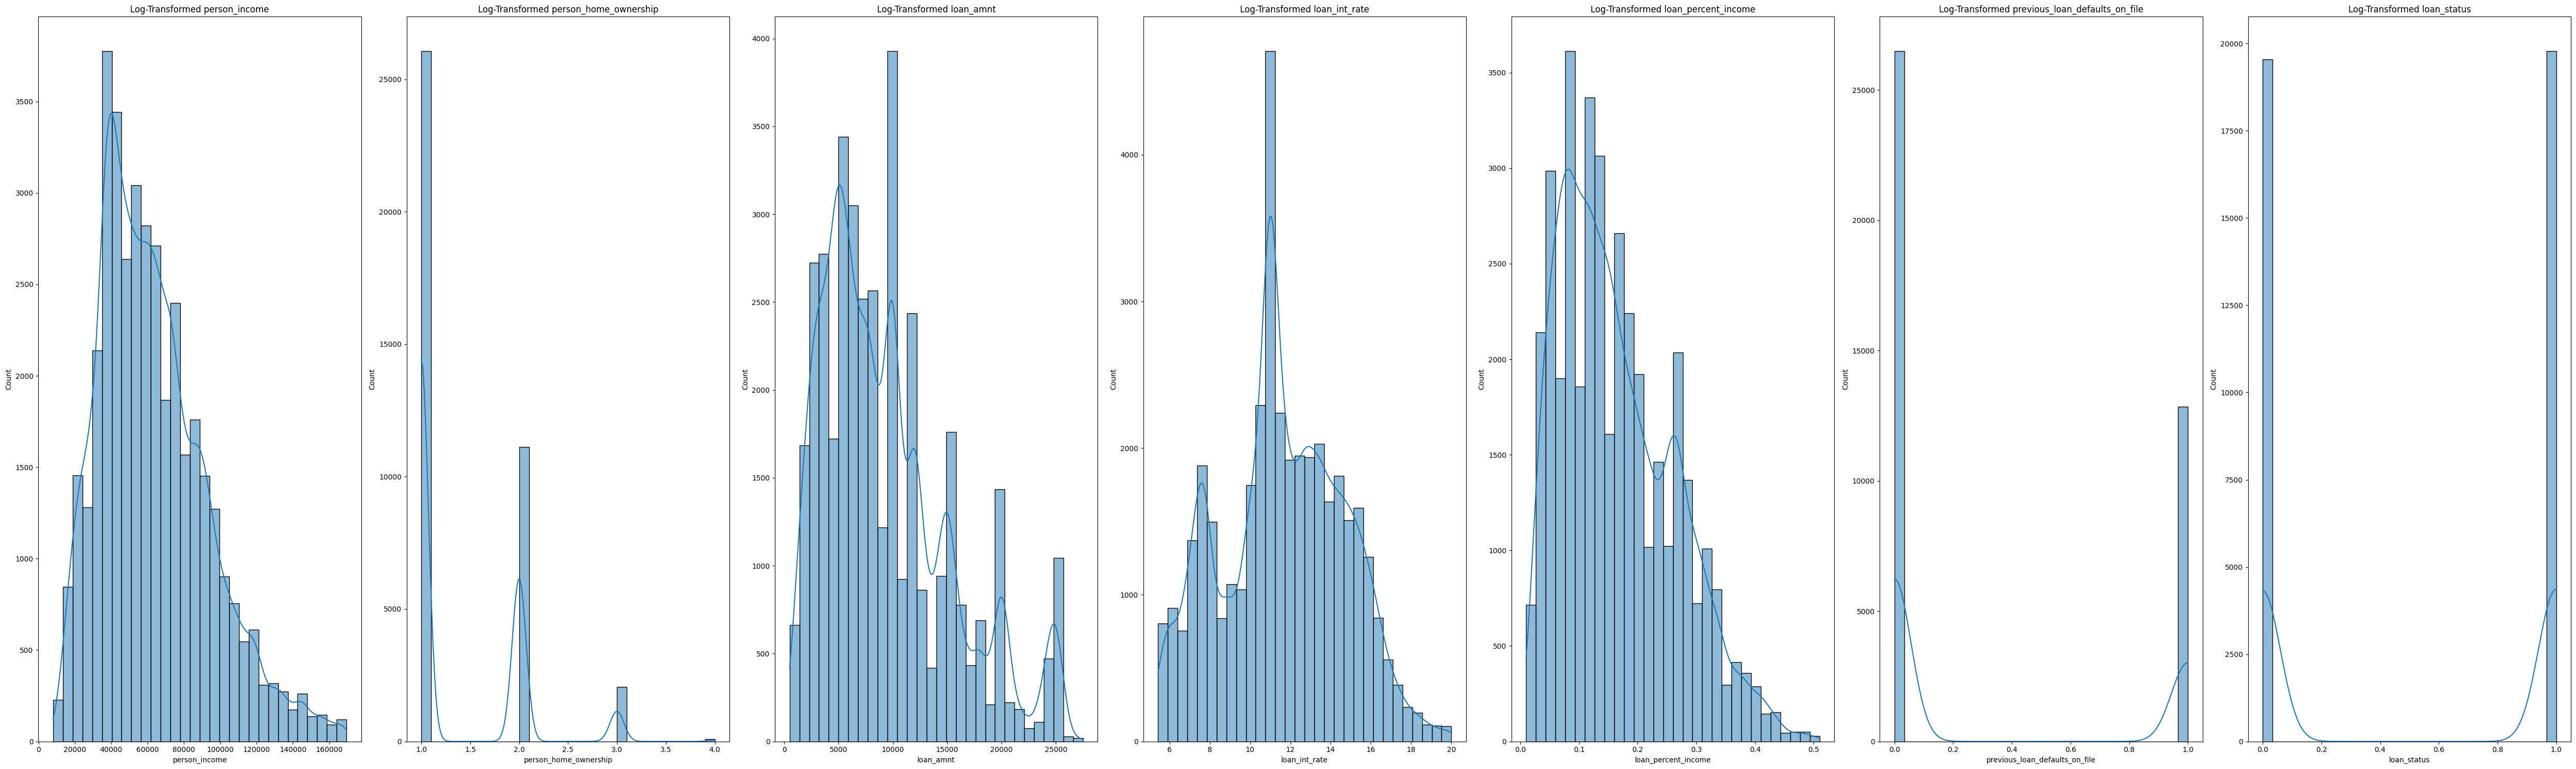

In [ ]:
# Apply log transformation to the data for normalization
data=np.log(df+1)

# Plot histogram of log-transformed data
plt.subplot(1,2,2)
sns.histplot(data, bins=30, kde=True)
plt.title("Log-Transformed Data")
plt.show()

# Plot histograms for each feature in the log-transformed data
num_features = df.shape[1]  # Number of features
plt.figure(figsize=(50, 15))  # Adjust the figure size

# Create a subplot for each feature
for i, column in enumerate(df.columns, 1):
    plt.subplot(1, num_features, i)  # Adjust layout for each feature
    sns.histplot(df[column], bins=30, kde=True)
    plt.title(f"Log-Transformed {column}")

plt.tight_layout()
plt.show()

In [ ]:
df.columns

Index(['person_income', 'person_home_ownership', 'loan_amnt', 'loan_int_rate',
       'loan_percent_income', 'previous_loan_defaults_on_file', 'loan_status'],
      dtype='object')



>  
Select relevant features for the prediction task.



In [ ]:

data['loan_status'] = (data['loan_status'] > 0.5).astype(int)

x = data[['person_income', 'person_home_ownership', 'loan_amnt', 'loan_int_rate', 'loan_percent_income', 'previous_loan_defaults_on_file']]
y = data['loan_status']


#MODEL TRAINING AND EVALUATION

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import RidgeClassifier,LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix # import confusion_matrix and accuracy_score

In [ ]:
# Create an RandomForestClassifier Classifier object
model_3 = RandomForestClassifier()  # You can adjust hyperparameters

# Train the model
model_3.fit(x_train, y_train)
00
# Make predictions on the test set
y_pred = model_3.predict(x_test)

# Evaluate the model's accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

cm = confusion_matrix(y_test, y_pred)
cm

Accuracy: 0.9230964789627558


array([[3545,  382],
       [ 223, 3717]])

In [ ]:
y_pred = model.predict(x_test)
y_pred

array([1, 1, 1, ..., 0, 1, 0])



> Train and evaluate a predictive model



In [ ]:
df.tail()

,person_income,person_home_ownership,loan_amnt,loan_int_rate,loan_percent_income,previous_loan_defaults_on_file,loan_status
40803,16182.782840,1,7220.367722,7.920020,0.445185,0,1.0
40804,42992.922410,1,7000.000000,13.043057,0.160000,0,1.0
40805,41665.539562,1,1001.316005,15.563683,0.020066,0,1.0
40806,22668.884510,2,6250.000000,7.720824,0.276577,0,1.0
40807,58965.212653,2,8000.000000,10.319957,0.140000,0,1.0


#REALTIME LOAN PREDICTION



> Predict loan approval status based on user input



In [ ]:
person_income = float(input("Enter person_income : "))
person_home_ownership = float(input("Enter person_home_ownership : "))
loan_amnt = float(input("Enter loan_amnt : "))
loan_int_rate = float(input("Enter loan_int_rate : "))
loan_percent_income = float(input("Enter loan_percent_income : "))
previous_loan_defaults_on_file = float(input("Enter previous_loan_defaults_on_file : "))

user_input = [[person_income, person_home_ownership, loan_amnt, loan_int_rate, loan_percent_income, previous_loan_defaults_on_file]]

loan_status = model.predict(user_input)
print("loan_status : ",loan_status)


Enter person_income : 0.22
Enter person_home_ownership : .33
Enter loan_amnt : .44
Enter loan_int_rate : 0.5
Enter loan_percent_income : 0.55
Enter previous_loan_defaults_on_file : 0.55
loan_status :  [0]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
